In [1]:
from keras.applications.vgg16 import VGG16
vgg = VGG16(include_top=False, input_shape=(224, 224, 3))
vgg.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [2]:
from keras.datasets.cifar10 import load_data
((x_train, y_train), (x_test, y_test)) = load_data()

In [3]:
print("訓練的維度:", x_train.shape)
print("測試的維度:", x_test.shape)

訓練的維度: (50000, 32, 32, 3)
測試的維度: (10000, 32, 32, 3)


In [4]:
mapdict = {0:"飛機", 1:"汽車", 2:"鳥", 3:"貓", 4:"鹿", 5:"狗", 6:"青蛙",
           7:"馬", 8:"船", 9:"貨車"}

標籤: 青蛙


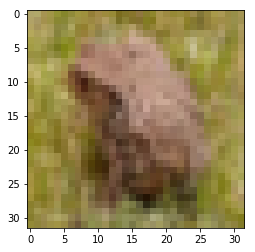

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import random
c = random.randint(0, 49999)
print("標籤:", mapdict[y_train[c][0]])
plt.imshow(x_train[c])

In [6]:
# normalize: (0~1)
x_train_shape = x_train / 255
x_test_shape = x_test / 255
# 目標: one-hot encoding
from keras.utils import np_utils
y_train_onehot = np_utils.to_categorical(y_train)
y_test_onehot = np_utils.to_categorical(y_test)

In [7]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
cnn = Sequential()
# 第一層: 把input shape設好
cnn.add(Conv2D(input_shape=(32, 32, 3), 
               kernel_size=(3, 3), 
               filters=32, 
               padding="same", 
               activation="relu"))
cnn.add(MaxPooling2D(pool_size=2))
cnn.add(Conv2D(kernel_size=(3, 3), 
               filters=64, 
               padding="same", 
               activation="relu"))
cnn.add(MaxPooling2D(pool_size=2))
cnn.add(Conv2D(kernel_size=(3, 3), 
               filters=128, 
               padding="same", 
               activation="relu"))
cnn.add(MaxPooling2D(pool_size=2))
cnn.add(Flatten())
cnn.add(Dropout(0.25))
cnn.add(Dense(units=256, activation="relu"))
cnn.add(Dropout(0.25))
cnn.add(Dense(units=10, activation="softmax"))
cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
__________

In [9]:
# 二分:binary_crossentropy
# 多元:categorical_crossentropy
cnn.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [10]:
# batch_size: 每看幾筆做一次梯度更新(100~200)
# epochs: 每一筆資料要看過幾次
# 總梯度更新次數: 資料筆數 * epochs / batch_size
# validation_split: train_test_split
# verbose: 輸出log的程度, 2
train_history = cnn.fit(x_train_shape, y_train_onehot, batch_size=200, 
                epochs=15, validation_split=0.1, verbose=2)

Train on 45000 samples, validate on 5000 samples
Epoch 1/15
 - 49s - loss: 1.6619 - acc: 0.3906 - val_loss: 1.3205 - val_acc: 0.5230
Epoch 2/15
 - 48s - loss: 1.2658 - acc: 0.5476 - val_loss: 1.0814 - val_acc: 0.6256
Epoch 3/15
 - 47s - loss: 1.0973 - acc: 0.6095 - val_loss: 0.9951 - val_acc: 0.6478
Epoch 4/15
 - 47s - loss: 0.9850 - acc: 0.6535 - val_loss: 0.9070 - val_acc: 0.6894
Epoch 5/15
 - 47s - loss: 0.9067 - acc: 0.6808 - val_loss: 0.8201 - val_acc: 0.7162
Epoch 6/15
 - 47s - loss: 0.8412 - acc: 0.7053 - val_loss: 0.8007 - val_acc: 0.7210
Epoch 7/15
 - 47s - loss: 0.7857 - acc: 0.7259 - val_loss: 0.7472 - val_acc: 0.7350
Epoch 8/15
 - 47s - loss: 0.7369 - acc: 0.7409 - val_loss: 0.7273 - val_acc: 0.7430
Epoch 9/15
 - 48s - loss: 0.7021 - acc: 0.7549 - val_loss: 0.7189 - val_acc: 0.7476
Epoch 10/15
 - 47s - loss: 0.6633 - acc: 0.7670 - val_loss: 0.7540 - val_acc: 0.7358
Epoch 11/15
 - 48s - loss: 0.6219 - acc: 0.7819 - val_loss: 0.6749 - val_acc: 0.7654
Epoch 12/15
 - 48s - loss

In [11]:
cnn.evaluate(x_test_shape, y_test_onehot)

10000/10000 [==============================] - 4s 396us/step


[0.6980721353530884, 0.7636]

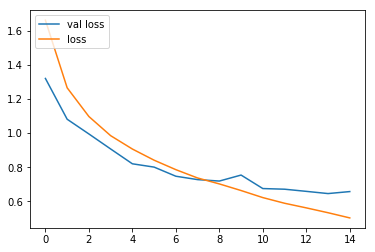

In [12]:
# 怎麼看幾次要停 - val_loss(藍線) -> 平緩 就可以停
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(train_history.history["val_loss"])
plt.plot(train_history.history["loss"])
plt.legend(["val loss", "loss"], loc="upper left")

In [13]:
import pandas as pd
# {0:"飛機", 1:"汽車", 2:"鳥", 3:"貓", 4:"鹿", 5:"狗", 6:"青蛙",7:"馬", 8:"船", 9:"貨車"}
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(cnn.predict_classes(x_test_shape), y_test))

,0,1,2,3,4,5,6,7,8,9
0,815,21,53,16,21,14,5,10,58,48
1,11,867,3,4,2,1,3,4,23,80
2,46,12,690,75,64,47,41,30,23,13
3,21,16,56,619,51,193,50,44,15,25
4,14,2,77,75,786,62,39,87,13,8
5,5,2,41,124,15,636,13,41,5,5
6,12,11,52,46,22,17,834,6,5,9
7,9,3,17,21,35,23,6,775,1,15
8,51,23,8,9,4,4,6,0,843,26
9,16,43,3,11,0,3,3,3,14,771
